In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

## Benchmark against Tim's website
- https://filedn.com/lU1GlyFhv3UuXg5E9dbnWFF/TJBHpages/hbpl.html
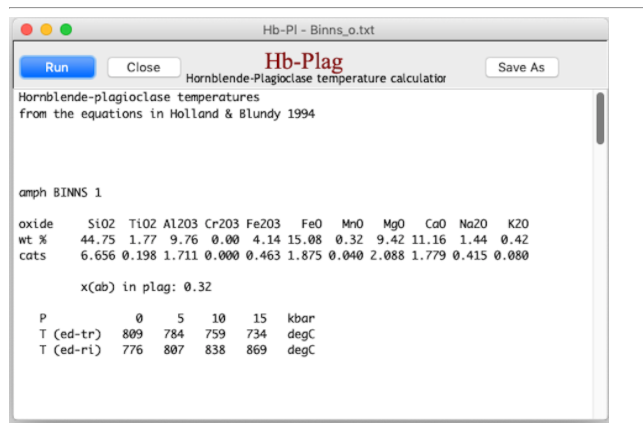

In [2]:
Amp_Tim=pd.DataFrame(data={'SiO2_Amp': 44.75,
                          'TiO2_Amp':1.77,
                          'Al2O3_Amp':9.76,
                          'Cr2O3_Amp':0,
                          'FeOt_Amp':4.14*0.8998+15.08,
                           'MnO_Amp': 0.32,
                           'MgO_Amp':9.42,
                           'CaO_Amp':11.16,
                           'Na2O_Amp':1.44,
                           'K2O_Amp':0.42,
                          }, index=[0])

In [3]:
Thermobar_Tim_0=pt.calculate_amp_plag_temp(amp_comps=Amp_Tim, XAb=0.32, XAn=1-0.32,
                                       equationT="T_HB1994_A", P=0)-273.1
Thermobar_Tim_0

0    809.708451
dtype: float64

In [4]:
Thermobar_Tim_15=pt.calculate_amp_plag_temp(amp_comps=Amp_Tim, XAb=0.32, XAn=1-0.32,
                                       equationT="T_HB1994_A", P=15)-273.1
Thermobar_Tim_15

0    734.379072
dtype: float64

In [2]:
Test_in=pt.import_excel(r'Jordans_Versions/RiMG069_Ch04_hbld_plag_thermo-jla_Jordan_Benchmark.xlsx', 
                        sheet_name='Thermobar_format')
Amps=Test_in['Amps']
Plags=Test_in['Plags']
Amps_input=Test_in['my_input']

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:355: UserWarning: You've got a column heading with a lower case _sp, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Sp)
  w.warn("You've got a column heading with a lower case _sp, this is okay if this column is for your"


0    0.985564
1    0.983409
2    0.991294
3    0.985684
4    0.988965
5    0.987841
6    0.989199
7    0.989821
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: XAb, dtype: float64


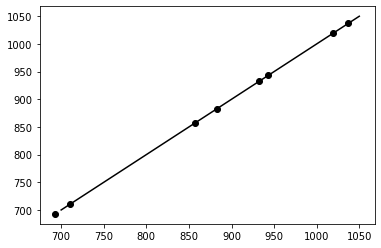

In [3]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Thermobar_A=pt.calculate_amp_plag_temp(amp_comps=Amps, XAb=Amps_input['XAb'], XAn=1-Amps_input['XAb'],
                                       equationT="T_HB1994_A", P=2)-273.15
plt.plot(Amps_input['Ta_Spreadsheet'],Thermobar_A, 'ok')
plt.plot([700, 1050], [700, 1050], '-k')

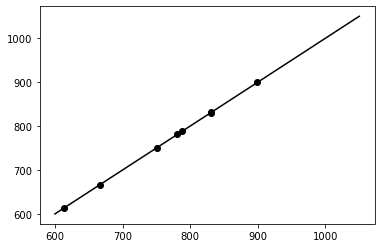

In [4]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Thermobar_B=pt.calculate_amp_plag_temp(amp_comps=Amps, XAb=Amps_input['XAb'], XAn=1-Amps_input['XAb'],
                                       equationT="T_HB1994_B", P=2)-273.15
plt.plot(Amps_input['Tb_spreadsheet'],Thermobar_B, 'ok')
plt.plot([600, 1050], [600, 1050], '-k')

## Using input plags and amps

In [5]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Thermobar_B_input=pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags,
                                       equationT="T_HB1994_B", P=5)-273.15
Thermobar_A_input=pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags,
                                       equationT="T_HB1994_A", P=5)-273.15

0    0.985564
1    0.983409
2    0.991294
3    0.985684
4    0.988965
5    0.987841
6    0.989199
7    0.989821
dtype: float64
0    5.769414
1    5.045600
2    4.736128
3    2.882944
4    5.701635
5    4.992286
6    5.642242
7    5.114170
Name: Ab_Plag, dtype: float64


In [6]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Plags.head()
An=pt.calculate_cat_fractions_plagioclase(plag_comps=Plags).An_Plag
Ab=pt.calculate_cat_fractions_plagioclase(plag_comps=Plags).Ab_Plag

Thermobar_B_input_An=pt.calculate_amp_plag_temp(amp_comps=Amps, XAn=An, XAb=Ab,
                                       equationT="T_HB1994_B", P=5)-273.15
Thermobar_A_input_An=pt.calculate_amp_plag_temp(amp_comps=Amps, XAn=An, XAb=Ab,
                                       equationT="T_HB1994_A", P=5)-273.15

0    0.985564
1    0.983409
2    0.991294
3    0.985684
4    0.988965
5    0.987841
6    0.989199
7    0.989821
dtype: float64
0    5.769414
1    5.045600
2    4.736128
3    2.882944
4    5.701635
5    4.992286
6    5.642242
7    5.114170
Name: Ab_Plag, dtype: float64


### First, show these are the same (input plag, input An)

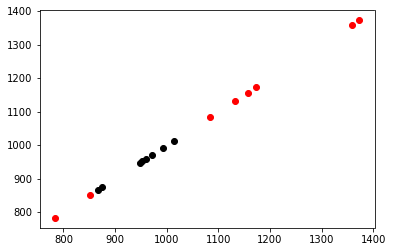

In [7]:
plt.plot(Thermobar_B_input_An, Thermobar_B_input, 'ok')
plt.plot(Thermobar_A_input_An, Thermobar_A_input, 'or')


## Compare to spreadsheet
- Original spreadsheet does Xan -Xab wrong

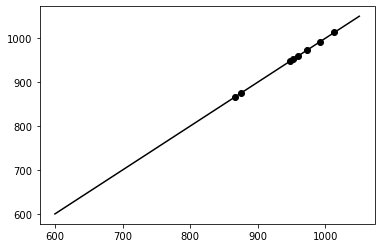

In [8]:
plt.plot(Amps_input['Tb_spreadsheet2'],Thermobar_B_input, 'ok')
plt.plot([600, 1050], [600, 1050], '-k')

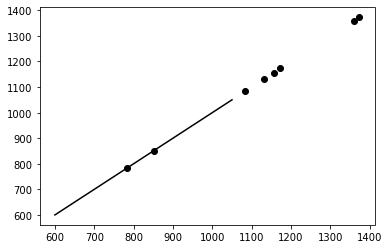

In [9]:
plt.plot(Amps_input['Ta_spreadsheet2'], Thermobar_A_input, 'ok')
plt.plot([600, 1050], [600, 1050], '-k')

In [10]:
pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags, equationT="T_HB1994_A", P=2)-273.15

0    1430.856761
1    1426.940326
2    1196.027305
3    1126.868935
4    1216.989609
5    1172.014997
6     895.151951
7     821.529445
dtype: float64

In [11]:
pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags, equationT="T_HB1994_B", P=2)-273.15

0    1001.058823
1     983.168858
2     936.689977
3     936.375401
4     958.641847
5     944.792330
6     872.400860
7     862.544691
dtype: float64

In [19]:
Amps_Holland=pd.DataFrame(data={'SiO2_Amp':44.75,
                               'TiO2_Amp':1.77,
                               'Cr2O3_Amp':0,
                                'Al2O3_Amp':9.76,
                               'FeOt_Amp':18.80,
                               'MnO_Amp':0.32,
                               'MgO_Amp':9.42,
                               'CaO_Amp':11.16,
                               'Na2O_Amp':1.44,
                               'K2O_Amp':0.42}, index=[0])

In [20]:
Amps_Holland=Amps
Amps_Holland

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,40.70,3.04,14.00,10.60,0.130,14.70,11.90,2.74,0.46,0.0,0.0,0.0,0
1,39.80,2.72,13.60,11.40,0.140,14.20,12.00,2.67,0.49,0.0,0.0,0.0,1
2,41.30,3.17,13.40,11.20,0.160,13.70,11.80,2.77,0.49,0.0,0.0,0.0,2
3,41.10,2.71,13.40,13.00,0.190,13.40,11.60,2.76,0.46,0.0,0.0,0.0,3
4,42.40,2.75,12.70,10.00,0.150,15.10,11.80,2.39,0.82,0.0,0.0,0.0,4
5,42.00,2.62,13.10,10.80,0.200,14.60,11.70,2.52,0.73,0.0,0.0,0.0,5
6,48.66,0.64,5.84,14.31,0.890,14.39,11.66,1.24,0.59,0.0,0.0,0.0,6
7,48.59,0.60,5.20,13.68,0.870,14.49,11.06,1.11,0.56,0.0,0.0,0.0,7
8,49.21,0.81,5.79,14.24,0.810,14.23,11.41,1.29,0.64,0.0,0.0,0.0,8
9,48.80,0.58,5.32,13.48,0.850,14.61,11.64,1.08,0.53,0.0,0.0,0.0,9


In [13]:
amp_apfu_df=pt.calculate_23oxygens_amphibole(amp_comps=Amps_Holland)
f1=16/(amp_apfu_df['cation_sum_All'])
f2=8/(amp_apfu_df['Si_Amp_cat_23ox'])
f3=15/(amp_apfu_df['cation_sum_All']-amp_apfu_df['Na_Amp_cat_23ox']-amp_apfu_df['K_Amp_cat_23ox'])
f4=2/amp_apfu_df['Ca_Amp_cat_23ox']
f5=1
f6=8/(amp_apfu_df['Si_Amp_cat_23ox']+amp_apfu_df['Al_Amp_cat_23ox'])
f7=15/(amp_apfu_df['cation_sum_All']-amp_apfu_df['K_Amp_cat_23ox'])
f8=12.9/(amp_apfu_df['cation_sum_All']-amp_apfu_df['Ca_Amp_cat_23ox']-amp_apfu_df['Na_Amp_cat_23ox']
         -amp_apfu_df['K_Amp_cat_23ox'])
f9=36/(46-amp_apfu_df['Si_Amp_cat_23ox']-amp_apfu_df['Al_Amp_cat_23ox']-amp_apfu_df['Ti_Amp_cat_23ox'])
f10=46/(amp_apfu_df['Fet_Amp_cat_23ox']+46)
fa=pd.DataFrame(data={'f1': f1, 'f2': f2, 'f3':f3, 'f4': f4, 'f5': f5})
fb=pd.DataFrame(data={'f6': f6, 'f7': f7, 'f8':f8, 'f9': f9, 'f10': f10})
fa_min=fa.min(axis="columns")
fb_max=fb.max(axis="columns")
f=(fa_min+fb_max)/2
fmin_greater1=fa_min>1
fmax_greater1=fb_max>1
f.loc[fmin_greater1]=1
f.loc[fmax_greater1]=1

amp_apfu_df_recalc=amp_apfu_df.drop(columns=['Fet_Amp_cat_23ox', 'oxy_renorm_factor',
                         'cation_sum_Si_Mg', 'cation_sum_Si_Ca', 'cation_sum_All', 'Mgno_Amp'])
amp_apfu_df_recalc=amp_apfu_df_recalc.multiply(f, axis='rows')
amp_apfu_df_recalc['Fe3_Amp_cat_23ox']=46*(1-f)
amp_apfu_df_recalc['Fe2_Amp_cat_23ox']=(amp_apfu_df.multiply(f, axis='rows').get('Fet_Amp_cat_23ox')
- amp_apfu_df_recalc['Fe3_Amp_cat_23ox'])

P=2
XAb=Amps_input
XAn=1-XAb
cm=((amp_apfu_df_recalc['Si_Amp_cat_23ox']+amp_apfu_df_recalc['Al_Amp_cat_23ox']
+amp_apfu_df_recalc['Ti_Amp_cat_23ox']+amp_apfu_df_recalc['Fe3_Amp_cat_23ox']
+ amp_apfu_df_recalc['Fe2_Amp_cat_23ox']+amp_apfu_df_recalc['Mg_Amp_cat_23ox']
+amp_apfu_df_recalc['Mn_Amp_cat_23ox'])-13)

XSi_T1=(amp_apfu_df_recalc['Si_Amp_cat_23ox']-4)/4
XAl_T1=(8-amp_apfu_df_recalc['Si_Amp_cat_23ox'])/4
XAl_M2=(amp_apfu_df_recalc['Si_Amp_cat_23ox']+amp_apfu_df_recalc['Al_Amp_cat_23ox']-8)/2
XK_A=amp_apfu_df_recalc['K_Amp_cat_23ox']
Xsq_A=(3-amp_apfu_df_recalc['Ca_Amp_cat_23ox']-amp_apfu_df_recalc['Na_Amp_cat_23ox']-amp_apfu_df_recalc['K_Amp_cat_23ox']
-cm)
XNa_A=amp_apfu_df_recalc['Ca_Amp_cat_23ox']+amp_apfu_df_recalc['Na_Amp_cat_23ox']+cm-2
XNa_M4=(2-amp_apfu_df_recalc['Ca_Amp_cat_23ox']-cm)/2
XCa_M4=amp_apfu_df_recalc['Ca_Amp_cat_23ox']/2
Ked_trA=(27/256)*(Xsq_A*XSi_T1*XAb)/(XNa_A*XAl_T1)
Ked_trB=(27/64)*(XNa_M4*XSi_T1*XAn)/(XCa_M4*XAl_T1*XAb)
YAb=12*(1-XAb)**2-3
HighXAb=XAb>0.5
YAb[HighXAb]=0

Ta=((-76.95+P*0.79+YAb+39.4*XNa_A+22.4*XK_A+(41.5-2.89*P)*XAl_M2)/
    (-0.065-0.0083144*np.log(Ked_trA)))-273.15

YAb_B=12*(2*XAb-1)+3
YAb_B[HighXAb]=3
Tb=((78.44 +YAb_B - 33.6*XNa_M4 - (66.8 -2.92*P)*XAl_M2 +78.5*XAl_T1 +9.4*XNa_A )/
    (0.0721-0.0083144*np.log(Ked_trB)))-273.15

Tb_spreadsheetAbterm=((78.44 +3- 33.6*XNa_M4 - (66.8 -2.92*P)*XAl_M2 +78.5*XAl_T1 +9.4*XNa_A )/
    (0.0721-0.0083144*np.log(Ked_trB)))-273.15


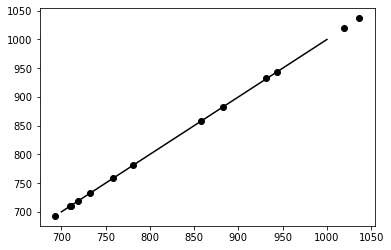

In [25]:
plt.plot(Amps_input['Ta_Spreadsheet'], Ta, 'ok')
plt.plot([700, 1000], [700, 1000], '-k')

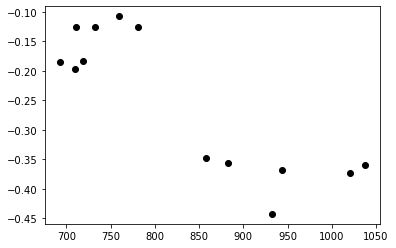

In [26]:
plt.plot(Ta, Amps_input['Ta_Spreadsheet']-Ta,  'ok')

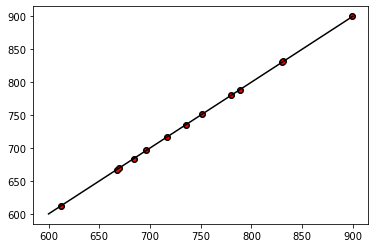

In [30]:
plt.plot(Amps_input['Tb_spreadsheet'], Tb, 'ok')
plt.plot(Amps_input['Tb_spreadsheet'], Tb_spreadsheetAbterm, '.r')

plt.plot([600, 900], [600, 900], '-k')

In [113]:
XAl_T1

0   -0.169274
1   -0.150935
2   -0.164945
3   -0.150933
4   -0.207011
5   -0.195953
Name: Si_Amp_cat_23ox, dtype: float64

In [102]:
Tb-273.15

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
dtype: float64

In [9]:
amp_apfu_df=pt.calculate_23oxygens_amphibole(amp_comps=Amps)
mutch=pt.get_amp_sites_mutch(amp_apfu_df)
mutch
f_cations, fav=pt.amp_components_ferric_ferrous(sites_df=mutch, norm_cations=amp_apfu_df)
sites=pt.get_amp_sites_ferric_ferrous(f_cations)
sites

,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe3_C,Fe2_C,Mn_C,Cr_C,Mg_B,Fe2_B,Mn_B,Na_B,Ca_B,Na_A,K_A
0,6.871845,1.128155,0.059997,0.141417,3.016791,0.402911,1.378884,0.000000e+00,0.0,0.0,-0.022582,0.095294,0.088953,1.838335,0.301397,0.169969
1,6.853077,1.146923,0.064078,0.147378,2.996666,0.403235,1.388644,0.000000e+00,0.0,0.0,-0.004491,0.087411,0.109437,1.807644,0.316843,0.177448
2,6.893316,1.106684,0.055168,0.144092,3.005125,0.360068,1.435546,0.000000e+00,0.0,0.0,-0.014910,0.087368,0.097654,1.829888,0.322330,0.178587
3,6.944762,1.055238,0.092180,0.144191,2.985964,0.288647,1.489018,0.000000e+00,0.0,0.0,-0.018025,0.095885,0.094642,1.827497,0.315071,0.165601
4,6.976059,1.023941,0.073575,0.139870,2.981071,0.416191,1.389293,0.000000e+00,0.0,0.0,0.000130,0.100000,0.114650,1.785219,0.237296,0.131790
5,7.201711,0.798289,0.085201,0.057605,3.148361,0.307745,1.401087,0.000000e+00,0.0,0.0,-0.023953,0.099793,0.087397,1.836762,0.266679,0.110850
6,7.062871,0.937129,0.061902,0.069874,3.113712,0.466724,1.287788,0.000000e+00,0.0,0.0,-0.017492,0.109417,0.094728,1.813347,0.254234,0.109250
7,7.168264,0.831736,0.072387,0.066581,3.186721,0.462559,1.211753,0.000000e+00,0.0,0.0,0.013442,0.108710,0.129630,1.748217,0.187865,0.105393
8,7.127514,0.872486,0.115885,0.088247,3.072544,0.356414,1.366909,-8.881784e-16,0.0,0.0,0.001524,0.099370,0.128412,1.770694,0.233849,0.118256
9,7.151231,0.848769,0.070049,0.063932,3.191683,0.423358,1.250978,0.000000e+00,0.0,0.0,-0.022348,0.105503,0.089219,1.827625,0.217635,0.099082


In [14]:
P=2
XAb=0.781
cm=(sites['Si_T']+(sites['Al_T']+sites['Al_C'])+sites['Ti_C']+sites['Fe3_C']+sites['Mg_C']+sites['Mn_C']+sites['Fe2_C']+sites['Fe2_B'])-13
XSi_T1=(sites['Si_T']-4)/4
XAl_T1=(8-sites['Si_T'])/4
XAl_M2=(sites['Si_T']+(sites['Al_T']+sites['Al_C'])-8)/2
Xvac_A=3-0-sites['Ca_B']-0-sites['Na_B']-sites['Na_A']-sites['K_A']-cm
XNa_A=0+sites['Ca_B']+0+sites['Na_B']+sites['Na_A']+cm-2
XNa_M4=(2-0-sites['Ca_B']-0-cm)/2
XCa_M4=(0+sites['Ca_B']+0)/2
XK_A=sites['K_A']
Ked_tr=(27/256)*(Xvac_A*XSi_T1*XAb)/(XNa_A*XAl_T1)
HB_1994_1=((-76.95+P*0.79+39.4*XNa_A+22.4*XK_A+(41.5-2.89*P)*XAl_M2)/(-0.065-0.0083144*np.log(Ked_tr)))-273.15
HB_1994_1

0     745.626377
1     751.871653
2     748.384600
3     727.204384
4     707.116514
5     680.026586
6     703.122484
7     644.485662
8     672.392918
9     672.374772
10    709.763603
11    742.176461
12    752.595792
dtype: float64

In [5]:
P=2
cm=B52+B55+B59+B60+B61+B62+B63+B67)-13
XSi_T1=(B52-4)/4
XAl_T1=(8-B52)/4
XAl_M2=(B52+B55-8)/2
Xvac_A=3-BX64-B68-B72-B69-B73-B74-B91
XNa_A=B64+B68+B72+B69+B73+B91-2
XNa_M4=(2-B64-B68-B72-B91)/2
XCa_M4=(B64+B68+B72)/2
XK_A=B74
Ked_tr=(27/256)*(B95*B92*B38)/(B96*B93)
HB_1994_1=((-76.95+P*0.79+39.4*XNa_A+22.4*XK_A+(41.5-2.89*P)*XAl_M2)/(-0.065-0.0083144*np.log(Ked_tr)))-273.15


,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,Mgno_Amp,Fe2O3_Amp_cat_23ox,FeO_Amp_cat_23ox
0,6.871845,3.016791,1.838335,1.188153,0.390350,0.169969,0.095294,0.141417,0.0,0.626123,0.402911,1.356301
1,6.853077,2.996666,1.807644,1.211000,0.426280,0.177448,0.087411,0.147378,0.0,0.620895,0.403235,1.384153
2,6.893316,3.005125,1.829888,1.161852,0.419984,0.178587,0.087368,0.144092,0.0,0.623006,0.360068,1.420636
3,6.944762,2.985964,1.827497,1.147418,0.409714,0.165601,0.095885,0.144191,0.0,0.625258,0.288647,1.470994
4,6.976059,2.981071,1.785219,1.097516,0.351947,0.131790,0.100000,0.139870,0.0,0.617149,0.416191,1.389423
5,7.201711,3.148361,1.836762,0.883490,0.354075,0.110850,0.099793,0.057605,0.0,0.647040,0.307745,1.377135
6,7.062871,3.113712,1.813347,0.999031,0.348962,0.109250,0.109417,0.069874,0.0,0.635393,0.466724,1.270296
7,7.168264,3.186721,1.748217,0.904123,0.317495,0.105393,0.108710,0.066581,0.0,0.647183,0.462559,1.225195
8,7.127514,3.072544,1.770694,0.988371,0.362261,0.118256,0.099370,0.088247,0.0,0.635499,0.356414,1.368433
9,7.151231,3.191683,1.827625,0.918818,0.306854,0.099082,0.105503,0.063932,0.0,0.652874,0.423358,1.228630


In [ ]:
def get_amp_sites_anderson(amp_apfu_df):
    """
    get_amp_sites takes generalized atom per formula unit calculations from
    calculate_23oxygens_amphibole and puts them in the proper cation sites
    according to the RimG069_Ch04_hbld_plag_thermo-jla.xlsx spreadsheet by Anderson.

    Parameters
    ----------
    amp_apfu_df : pandas DataFrame
        This is the dataframe output from calculate_23oxygens_amphibole. You should
        not have to modify this dataframe at all.


    Returns
    -------
    sites_df : pandas DataFrame
        a samples by cation sites dimension dataframe where each column corresponds
        to a cation site in amphibole. The suffix at the end corresponds to which site
        the cation is in:
            T = tetrahedral sites (8 total)
            C = octahedral sites (5 total)
            B  = M4 sites (2 total)
            A = A site (0 - 1 total)
    """



    norm_cations = amp_apfu_df.copy()

    # Take unambigous ones and allocate them, set everything else to zero


    norm_cations['Si_T']=norm_cations['Si_Amp_cat_23ox']
    norm_cations['Al_T']=0
    norm_cations['Al_C']=0
    norm_cations['Ti_C']=norm_cations['Ti_Amp_cat_23ox']
    norm_cations['Mg_C']=0
    norm_cations['Fe_C']=0
    norm_cations['Mn_C']=0
    norm_cations['Cr_C']=norm_cations['Cr_Amp_cat_23ox']
    norm_cations['Mg_B']=0
    norm_cations['Fe_B']=0
    norm_cations['Mn_B']=0
    norm_cations['Na_B']=0
    norm_cations['Ca_B']=norm_cations['Ca_Amp_cat_23ox']
    norm_cations['Na_A']=0
    norm_cations['K_A']=norm_cations['K_Amp_cat_23ox']

    norm_cations['Al_T']=8-norm_cations['Si_T'] # Doesnt use any if logic
    norm_cations['Al_C']=norm_cations['Si_Amp_cat_23ox']-norm_cations['Al_T']
    
    
    # 5a) Leake T Sites. Place all Si here, if Si<8, fill rest of T with Al.
    
    #If Si + Al is greater than 8, need to split Al between Al_T and Al_C as it can't all go here
    Si_Ti_sum_gr8=(norm_cations['Si_Amp_cat_23ox']+norm_cations['Al_Amp_cat_23ox'])>8
    # Calculate the amount of Ti sites left to fill after putting Si in. dont need to worry
    # about overallocating Ti, as already know they sum to more than 8.
    Al_T_Si_Ti_sum_gr8=8-norm_cations['Si_Amp_cat_23ox']
    # Got to be careful here, if Si on 23ox is >8, Al_T_Si_Ti_sum_gr8 ends up negative. Add another check
    Si_l_8=(norm_cations['Si_Amp_cat_23ox']<=8)
    # If Si is less than 8 already, set Ti to the difference
    norm_cations.loc[(Si_Ti_sum_gr8&Si_l_8), 'Al_T']=Al_T_Si_Ti_sum_gr8
    # If Si is greater than 8, set Al_T to zero
    norm_cations.loc[(Si_Ti_sum_gr8&(~Si_l_8)), 'Al_T']=0


    # Put remaining Al
    norm_cations.loc[(Si_Ti_sum_gr8), 'Al_C']=norm_cations['Al_Amp_cat_23ox']-norm_cations['Al_T']

    #If Si+Al<8, put all Al in tetrahedlra sites
    Si_Ti_sum_less8=(norm_cations['Si_Amp_cat_23ox']+norm_cations['Al_Amp_cat_23ox'])<8
    norm_cations.loc[(Si_Ti_sum_less8), 'Al_T']=norm_cations['Al_Amp_cat_23ox']
    norm_cations.loc[(Si_Ti_sum_less8), 'Al_C']=0

    # 5b) Leake Octaherdal C sites.
    #already filled some with Al in lines above. Place Ti (unambg), Cr (unamb).
    # Fill sites with Mg, Fe, and Mn to bring total to 5.

    # If Sites sum to less than 5, place all elements here
    Al_Ti_Cr_Mg_Fe_Mn_less5=(norm_cations['Al_C']+norm_cations['Ti_Amp_cat_23ox']+norm_cations['Fet_Amp_cat_23ox']
    +norm_cations['Cr_Amp_cat_23ox']+norm_cations['Mn_Amp_cat_23ox']+norm_cations['Mg_Amp_cat_23ox'])<5

    norm_cations.loc[(Al_Ti_Cr_Mg_Fe_Mn_less5), 'Fe_C']=norm_cations['Fet_Amp_cat_23ox']
    norm_cations.loc[(Al_Ti_Cr_Mg_Fe_Mn_less5), 'Mn_C']=norm_cations['Mn_Amp_cat_23ox']
    norm_cations.loc[(Al_Ti_Cr_Mg_Fe_Mn_less5), 'Mg_C']=norm_cations['Mg_Amp_cat_23ox']


    #If sites sum to more than 5, after placing Ti and Cr here, fill rest with Mg, Fe and Mn
    Al_Ti_Cr_Mg_Fe_Mn_more5=(norm_cations['Al_C']+norm_cations['Ti_Amp_cat_23ox']+norm_cations['Fet_Amp_cat_23ox']
    +norm_cations['Cr_Amp_cat_23ox']+norm_cations['Mn_Amp_cat_23ox']+norm_cations['Mg_Amp_cat_23ox'])>5

    # First, check if Al+Cr+Ti sum to 5. If not, allocate Mg
    sum_C_Al_Cr_Ti=norm_cations['Al_C']+norm_cations['Cr_C']+norm_cations['Ti_C']
    check_C_Al_Cr_Ti=sum_C_Al_Cr_Ti<5
    norm_cations.loc[((Al_Ti_Cr_Mg_Fe_Mn_more5)&(check_C_Al_Cr_Ti)), 'Mg_C']=norm_cations['Mg_Amp_cat_23ox']

    # Now check you haven't added too much MgO to take you over 5
    sum_C_Al_Cr_Ti_Mg=norm_cations['Al_C']+norm_cations['Cr_C']+norm_cations['Ti_C']+norm_cations['Mg_C']
    check_C_Al_Cr_Ti_Mg_low=sum_C_Al_Cr_Ti_Mg<=5
    check_C_Al_Cr_Ti_Mg_high=sum_C_Al_Cr_Ti_Mg>5
    # If sum is >5, replace Mg with only the magnesium left needed to get to 5.
    norm_cations.loc[((Al_Ti_Cr_Mg_Fe_Mn_more5)&(check_C_Al_Cr_Ti_Mg_high)), 'Mg_C']=5-sum_C_Al_Cr_Ti

    # Now check if you are back under 5 again,  ready to allocate Fe
    sum_C_Al_Cr_Ti_Mg2=norm_cations['Al_C']+norm_cations['Cr_C']+norm_cations['Ti_C']+norm_cations['Mg_C']
    check_C_Al_Cr_Ti_Mg_low2=sum_C_Al_Cr_Ti_Mg2<5
    norm_cations.loc[((Al_Ti_Cr_Mg_Fe_Mn_more5)&(check_C_Al_Cr_Ti_Mg_low2)), 'Fe_C']=norm_cations['Fet_Amp_cat_23ox']

    # Now check you haven't added too much FeO to take you over 5
    sum_C_Al_Cr_Ti_Mg_Fe=(norm_cations['Al_C']+norm_cations['Cr_C']
    +norm_cations['Ti_C']+norm_cations['Mg_C']+norm_cations['Fe_C'])
    check_C_Al_Cr_Ti_Mg_Fe_low=sum_C_Al_Cr_Ti_Mg_Fe<=5
    check_C_Al_Cr_Ti_Mg_Fe_high=sum_C_Al_Cr_Ti_Mg_Fe>5
    # If sum is >5, replace Fe with only the Fe left needed to get to 5.
    norm_cations.loc[((Al_Ti_Cr_Mg_Fe_Mn_more5)&(check_C_Al_Cr_Ti_Mg_Fe_high)), 'Fe_C']=5-sum_C_Al_Cr_Ti_Mg2

    # Now check if you are back under 5 again,  ready to allocate Mn
    sum_C_Al_Cr_Ti_Mg_Fe2=(norm_cations['Al_C']+norm_cations['Cr_C']+norm_cations['Ti_C']
    +norm_cations['Mg_C']+norm_cations['Fe_C'])
    check_C_Al_Cr_Ti_Mg_Fe_low2=sum_C_Al_Cr_Ti_Mg_Fe2<5
    norm_cations.loc[((Al_Ti_Cr_Mg_Fe_Mn_more5)&(check_C_Al_Cr_Ti_Mg_Fe_low2)), 'Mn_C']=norm_cations['Mn_Amp_cat_23ox']

    # Now check you haven't added too much Mn to take you over 5
    sum_C_Al_Cr_Ti_Mg_Fe_Mn=(norm_cations['Al_C']+norm_cations['Cr_C']
    +norm_cations['Ti_C']+norm_cations['Mg_C']+norm_cations['Fe_C']+norm_cations['Mn_C'])
    check_C_Al_Cr_Ti_Mg_Fe_Mn_low=sum_C_Al_Cr_Ti_Mg_Fe_Mn<=5
    check_C_Al_Cr_Ti_Mg_Fe_Mn_high=sum_C_Al_Cr_Ti_Mg_Fe_Mn>5
    # If sum is >5, replace Mn with only the Mn left needed to get to 5.
    norm_cations.loc[((Al_Ti_Cr_Mg_Fe_Mn_more5)&(check_C_Al_Cr_Ti_Mg_Fe_Mn_high)), 'Mn_C']=5-sum_C_Al_Cr_Ti_Mg_Fe2



    # 5c) Leake. B Sites-
    # if any Mg, Fe, Mn or Ca remaining put here;
    Mg_remaining=norm_cations['Mg_Amp_cat_23ox']-norm_cations['Mg_C']
    Fe_remaining=norm_cations['Fet_Amp_cat_23ox']-norm_cations['Fe_C']
    Mn_remaining=norm_cations['Mn_Amp_cat_23ox']-norm_cations['Mn_C']

    norm_cations['Mg_B']= Mg_remaining
    norm_cations['Fe_B']= Fe_remaining
    norm_cations['Mn_B']= Mn_remaining



    # If B sites sum to less than 2, fill sites with Na to bring total to 2

    Sum_B=norm_cations['Mg_B']+norm_cations['Fe_B']+norm_cations['Mn_B']+norm_cations['Ca_B']
    Left_to_fill_B=2- Sum_B
    # Check there is actually enough Na to fill B this way fully, if so allocate the amount you need
    Enough_Na=norm_cations['Na_Amp_cat_23ox']>=Left_to_fill_B
    norm_cations.loc[((Sum_B<2)&(Enough_Na)), 'Na_B']=Left_to_fill_B
    #  If there isn't enough Na2O, allocate all Na2O you have
    norm_cations.loc[((Sum_B<2)&(~Enough_Na)), 'Na_B']=norm_cations['Na_Amp_cat_23ox']
    Na_left_AfterB=norm_cations['Na_Amp_cat_23ox']-norm_cations['Na_B']

    # A sites
    norm_cations['K_A']=norm_cations['K_Amp_cat_23ox']
    norm_cations['Na_A']=Na_left_AfterB

    norm_cations['Sum_T']=norm_cations['Al_T']+norm_cations['Si_T']
    norm_cations['Sum_C']=(norm_cations['Al_C']+norm_cations['Cr_C']+norm_cations['Mg_C']
    +norm_cations['Fe_C']+norm_cations['Mn_C'])
    norm_cations['Sum_B']=(norm_cations['Mg_B']+norm_cations['Fe_B']+norm_cations['Mn_B']
    +norm_cations['Ca_B']+norm_cations['Na_B'])
    norm_cations['Sum_A']=norm_cations['K_A']+norm_cations['Na_A']

    norm_cations['cation_sum_All'] = norm_cations['cation_sum_Si_Ca'] + \
        norm_cations['Na_Amp_cat_23ox'] + +norm_cations['K_Amp_cat_23ox']
    norm_cations['Mgno_Amp']=norm_cations['Mg_Amp_cat_23ox']/(norm_cations['Mg_Amp_cat_23ox']
    +norm_cations['Fet_Amp_cat_23ox'])

    #norm_cations['factor']=np.max()
    # Ones being used, uses FW for Si, Fy,
    return norm_cations

In [9]:
amp_apfu_df=pt.calculate_23oxygens_amphibole(amp_comps=Amps)
mutch=pt.get_amp_sites_mutch(amp_apfu_df)
mutch

,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A
0,6.932566,1.067434,0.131218,0.142667,3.043449,1.682667,0.0,0.0,0.0,0.092090,0.096136,-0.042806,1.854580,0.436606,0.171471
1,6.913683,1.086317,0.135392,0.148681,3.023167,1.692760,0.0,0.0,0.0,0.110435,0.088184,-0.022248,1.823629,0.452298,0.179018
2,6.947699,1.052301,0.118718,0.145229,3.028834,1.707219,0.0,0.0,0.0,0.087534,0.088057,-0.019916,1.844325,0.443213,0.179996
3,6.988615,1.011385,0.143278,0.145102,3.004819,1.706801,0.0,0.0,0.0,0.063951,0.096491,0.000522,1.839037,0.411779,0.166646
4,7.039752,0.960248,0.147289,0.141147,3.008289,1.703275,0.0,0.0,0.0,0.118824,0.100913,-0.021256,1.801519,0.376416,0.132993
5,7.250216,0.749784,0.139657,0.057993,3.169566,1.632785,0.0,0.0,0.0,0.063443,0.100466,-0.013042,1.849133,0.369502,0.111597
6,7.135266,0.864734,0.144537,0.070591,3.145628,1.639243,0.0,0.0,0.0,0.115581,0.110538,-0.058053,1.831934,0.410592,0.110369
7,7.241078,0.758922,0.154384,0.067257,3.219091,1.559268,0.0,0.0,0.0,0.145630,0.109815,-0.021420,1.765975,0.342140,0.106464
8,7.183170,0.816830,0.179259,0.088936,3.096537,1.635268,0.0,0.0,0.0,0.103048,0.100146,0.012285,1.784521,0.352804,0.119179
9,7.217658,0.782342,0.145011,0.064526,3.221330,1.569132,0.0,0.0,0.0,0.098201,0.106483,-0.049286,1.844602,0.358990,0.100003


In [8]:
pt.get_amp_sites_from_input(amp_comps=Amps)

,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Sum_T,Sum_C,Sum_B,Sum_A
0,6.932566,3.043449,1.774757,1.854580,1.198651,0.393799,0.171471,0.096136,0.142667,0.0,0.0,13.188227,15.042806,15.608076,0.631656,6.932566,1.067434,0.131218,0.142667,3.043449,1.682667,0,0.0,0.0,0.092090,0.096136,0.000000,1.854580,0.393799,0.171471,8.0,4.857333,2.042806,0.565270
1,6.913683,3.023167,1.803195,1.823629,1.221710,0.430050,0.179018,0.088184,0.148681,0.0,0.0,13.198619,15.022248,15.631315,0.626386,6.913683,1.086317,0.135392,0.148681,3.023167,1.692760,0,0.0,0.0,0.110435,0.088184,0.000000,1.823629,0.430050,0.179018,8.0,4.851319,2.022248,0.609068
2,6.947699,3.028834,1.794753,1.844325,1.171019,0.423297,0.179996,0.088057,0.145229,0.0,0.0,13.175591,15.019916,15.623209,0.627922,6.947699,1.052301,0.118718,0.145229,3.028834,1.707219,0,0.0,0.0,0.087534,0.088057,0.000000,1.844325,0.423297,0.179996,8.0,4.854771,2.019916,0.603293
3,6.988615,3.004819,1.770752,1.839037,1.154664,0.412301,0.166646,0.096491,0.145102,0.0,0.0,13.160441,14.999478,15.578425,0.629206,6.988615,1.011385,0.143278,0.145102,3.004819,1.706801,0,0.0,0.0,0.063951,0.096491,0.000522,1.839037,0.411779,0.166646,8.0,4.854898,2.000000,0.578425
4,7.039752,3.008289,1.822099,1.801519,1.107536,0.355160,0.132993,0.100913,0.141147,0.0,0.0,13.219737,15.021256,15.509409,0.622784,7.039752,0.960248,0.147289,0.141147,3.008289,1.703275,0,0.0,0.0,0.118824,0.100913,0.000000,1.801519,0.355160,0.132993,8.0,4.858853,2.021256,0.488153
5,7.250216,3.169566,1.696228,1.849133,0.889440,0.356460,0.111597,0.100466,0.057993,0.0,0.0,13.163909,15.013042,15.481099,0.651398,7.250216,0.749784,0.139657,0.057993,3.169566,1.632785,0,0.0,0.0,0.063443,0.100466,0.000000,1.849133,0.356460,0.111597,8.0,4.942007,2.013042,0.468057
6,7.135266,3.145628,1.754825,1.831934,1.009271,0.352539,0.110369,0.110538,0.070591,0.0,0.0,13.226120,15.058053,15.520962,0.641906,7.135266,0.864734,0.144537,0.070591,3.145628,1.639243,0,0.0,0.0,0.115581,0.110538,0.000000,1.831934,0.352539,0.110369,8.0,4.929409,2.058053,0.462908
7,7.241078,3.219091,1.704898,1.765975,0.913307,0.320720,0.106464,0.109815,0.067257,0.0,0.0,13.255445,15.021420,15.448604,0.653757,7.241078,0.758922,0.154384,0.067257,3.219091,1.559268,0,0.0,0.0,0.145630,0.109815,0.000000,1.765975,0.320720,0.106464,8.0,4.932743,2.021420,0.427184
8,7.183170,3.096537,1.738316,1.784521,0.996089,0.365090,0.119179,0.100146,0.088936,0.0,0.0,13.203194,14.987715,15.471984,0.640461,7.183170,0.816830,0.179259,0.088936,3.096537,1.635268,0,0.0,0.0,0.103048,0.100146,0.012285,1.784521,0.352804,0.119179,8.0,4.911064,2.000000,0.471984
9,7.217658,3.221330,1.667333,1.844602,0.927353,0.309704,0.100003,0.106483,0.064526,0.0,0.0,13.204684,15.049286,15.458993,0.658939,7.217658,0.782342,0.145011,0.064526,3.221330,1.569132,0,0.0,0.0,0.098201,0.106483,0.000000,1.844602,0.309704,0.100003,8.0,4.935474,2.049286,0.409707
